In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')
sns.set(font_scale = 2.5)

#missingno -- dataset에 채워지지 않은 null data 쉽게 보여줌
import missingno as msno
#ignore warnings
import warnings
warnings.filterwarnings('ignore')

#inline 하면 노트북에 바로 바로 볼 수 있음!
%matplotlib inline

In [2]:
df_train = pd.read_csv('../input/titanic/train.csv')
df_test = pd.read_csv('../input/titanic/test.csv')

In [3]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
#통계치 반환 
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [6]:
#{:> 10} 오른쪽 정렬 {:<10} 왼쪽 정렬
#{:.2f} 결측치를 소수 두번째 자리까지 %로 나타내는거 
for col in df_train.columns:
    msg = 'column: {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100 * (df_train[col].isnull().sum() / df_train[col].shape[0]))
    print(msg)

column: PassengerId	 Percent of NaN value: 0.00%
column:   Survived	 Percent of NaN value: 0.00%
column:     Pclass	 Percent of NaN value: 0.00%
column:       Name	 Percent of NaN value: 0.00%
column:        Sex	 Percent of NaN value: 0.00%
column:        Age	 Percent of NaN value: 19.87%
column:      SibSp	 Percent of NaN value: 0.00%
column:      Parch	 Percent of NaN value: 0.00%
column:     Ticket	 Percent of NaN value: 0.00%
column:       Fare	 Percent of NaN value: 0.00%
column:      Cabin	 Percent of NaN value: 77.10%
column:   Embarked	 Percent of NaN value: 0.22%


In [7]:
for col in df_test.columns:
    msg = 'column: {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100 * (df_test[col].isnull().sum() / df_train[col].shape[0]))
    print(msg)

column: PassengerId	 Percent of NaN value: 0.00%
column:     Pclass	 Percent of NaN value: 0.00%
column:       Name	 Percent of NaN value: 0.00%
column:        Sex	 Percent of NaN value: 0.00%
column:        Age	 Percent of NaN value: 9.65%
column:      SibSp	 Percent of NaN value: 0.00%
column:      Parch	 Percent of NaN value: 0.00%
column:     Ticket	 Percent of NaN value: 0.00%
column:       Fare	 Percent of NaN value: 0.11%
column:      Cabin	 Percent of NaN value: 36.70%
column:   Embarked	 Percent of NaN value: 0.00%


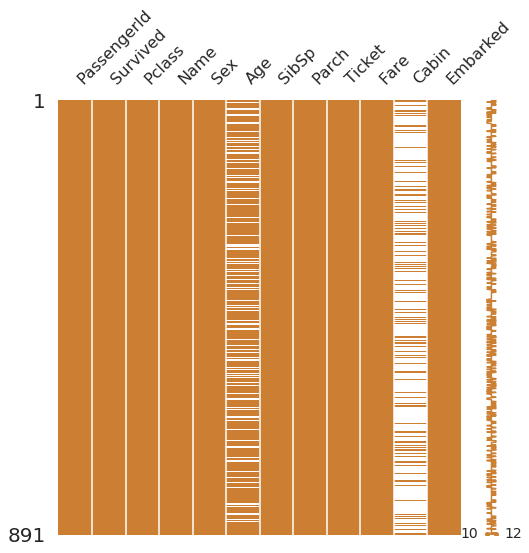

In [8]:
msno.matrix(df=df_train.iloc[:,:],figsize=(8,8),color =(0.8,0.5,0.2))

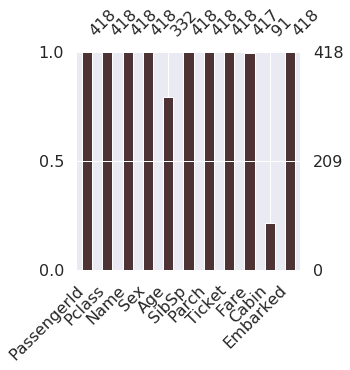

In [9]:
#missingno 데이터프레임 pandas indexing해주는거 원하는 row나 원하는 column 
#color에 있는 숫자는 rgb 숫자임
#figsize ㄹㅇ 사이즈 말하는거
msno.bar(df=df_test.iloc[:,:],figsize=(4,4),color =(0.3,0.2,0.2))

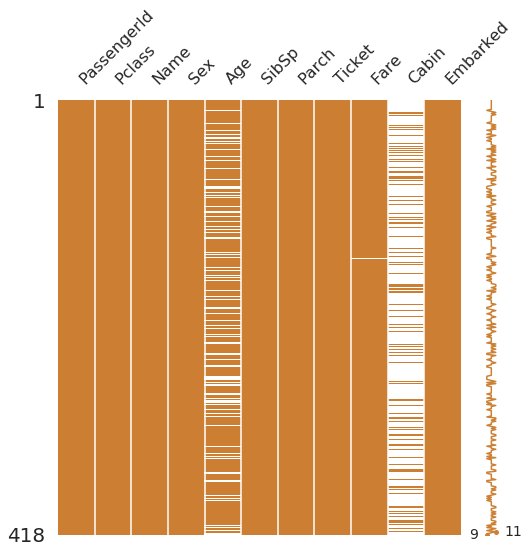

In [10]:
msno.matrix(df=df_test.iloc[:, :], figsize=(8, 8), color=(0.8, 0.5, 0.2))

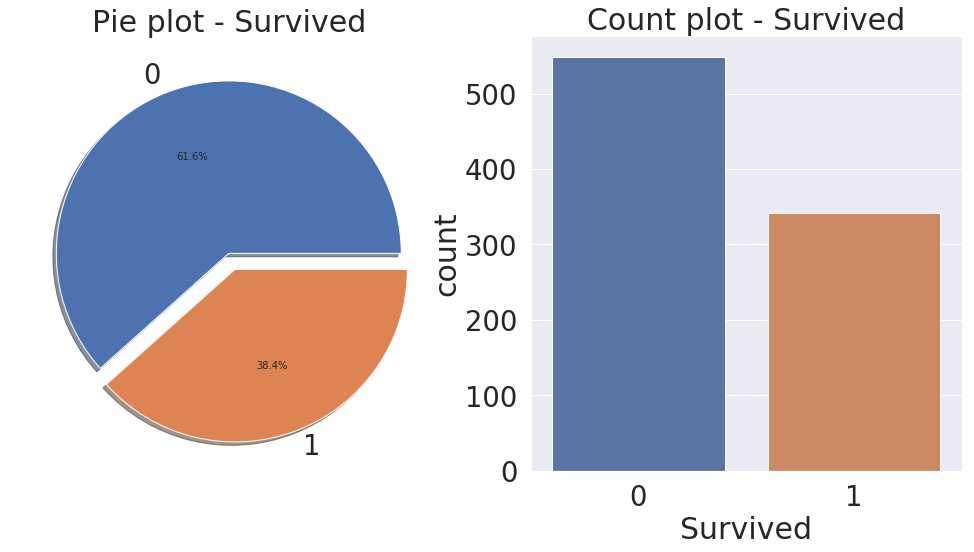

In [11]:
#코드 함수 해석해보기 
#as=as[0] 도화지에 첫번째 그림
# plt.subplots(pyplot의 subplot은 팔레트 깐다고 생각.)
f, ax = plt.subplots(1,2, figsize =(17,8)) #1행2열 1행에 2개의 그림 figure size 가로로 18, 세로로 8
df_train['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct ='%1.1f%%',
                                            ax=ax[0],shadow=True)
ax[0].set_title('Pie plot - Survived')
ax[0].set_ylabel('')
sns.countplot('Survived', data=df_train, ax=ax[1])
ax[1].set_title('Count plot - Survived') #그래프 제목

plt.show()

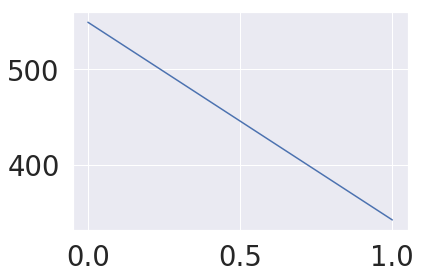

In [12]:
plt.plot(df_train['Survived'].value_counts())

 **** 2.1 Pclass
 * Pclass ordinal, 서수형 데이터/ 카데고리이면서 순서가 있는 데이터 타입
 * 생존률의 차이를 알 수 있다. groupby 를 사용하면 쉽게 할 수 있음
 *'Pclass', 'Survived'를 가져온 후 pclass로 묶는다. 그러면 각 pclass마다 0,1이 count 이를 평균내면 각 pclass별 생존률이 나옴

In [13]:
# count 객체가 몇 개임?
df_train[['Pclass','Survived']].groupby(['Pclass'],as_index =True).count()

,Survived
Pclass,
1,216
2,184
3,491


In [14]:
#객체중 1인 애들 몇 개임?
df_train[['Pclass','Survived']].groupby(['Pclass'],as_index =True).sum()

,Survived
Pclass,
1,136
2,87
3,119


In [15]:
df_train[['Pclass','Survived']].groupby(['Pclass'],as_index =True).mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [16]:
#Pclass 행 Survived 열. gradient-- background_gradient 기울어지는 값에 따라 색 바꿔줄고임 ~~ 
pd.crosstab(df_train['Pclass'], df_train['Survived'], margins=True).style.background_gradient(cmap='cool')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


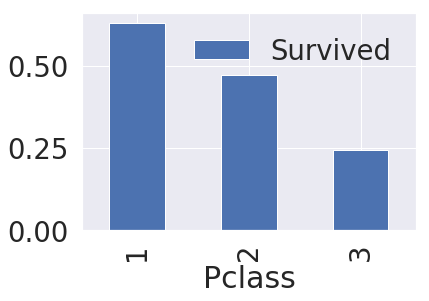

In [17]:
#ascend = False 내림차순 
df_train[['Pclass','Survived']].groupby(['Pclass'],as_index=True).mean().sort_values(by='Survived',ascending=False).plot.bar()

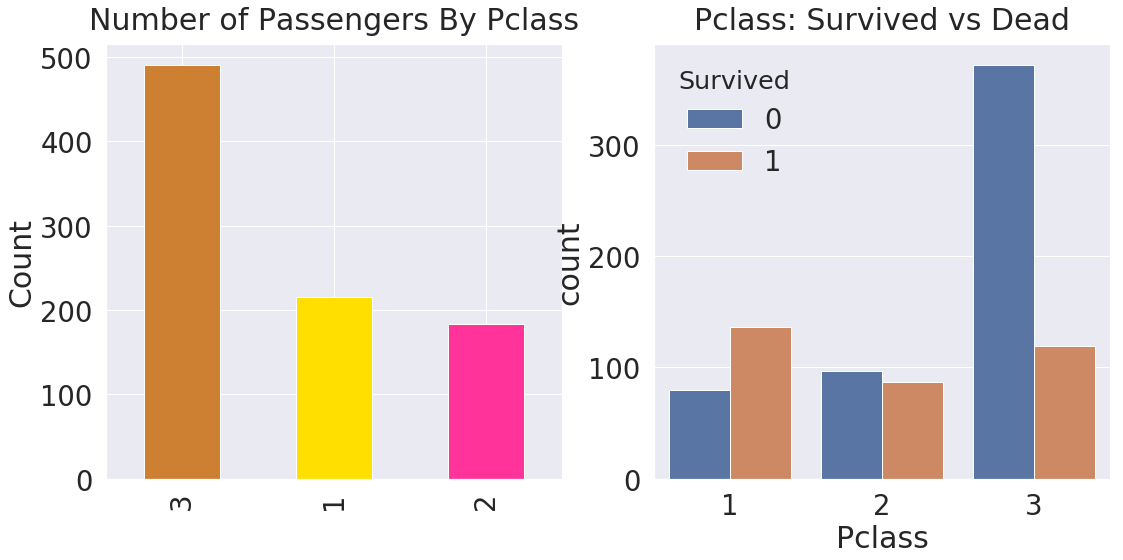

In [18]:
# firstclass에 있을떄 더 잘 사니까
# Pclass가 높을 수록 생존확률이 더 높다
# class를 쓰면 모델에 더 좋은 모델링?을 적용할 수 있음
y_position =1.02
f, ax = plt.subplots(1,2, figsize =(18,8))
df_train['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00',
                                                 '#FF3399'],ax =ax[0])
ax[0].set_title('Number of Passengers By Pclass',y=y_position)
ax[0].set_ylabel('Count')
sns.countplot('Pclass',hue='Survived',data=df_train,ax=ax[1])
ax[1].set_title('Pclass: Survived vs Dead', y= y_position)
plt.show()

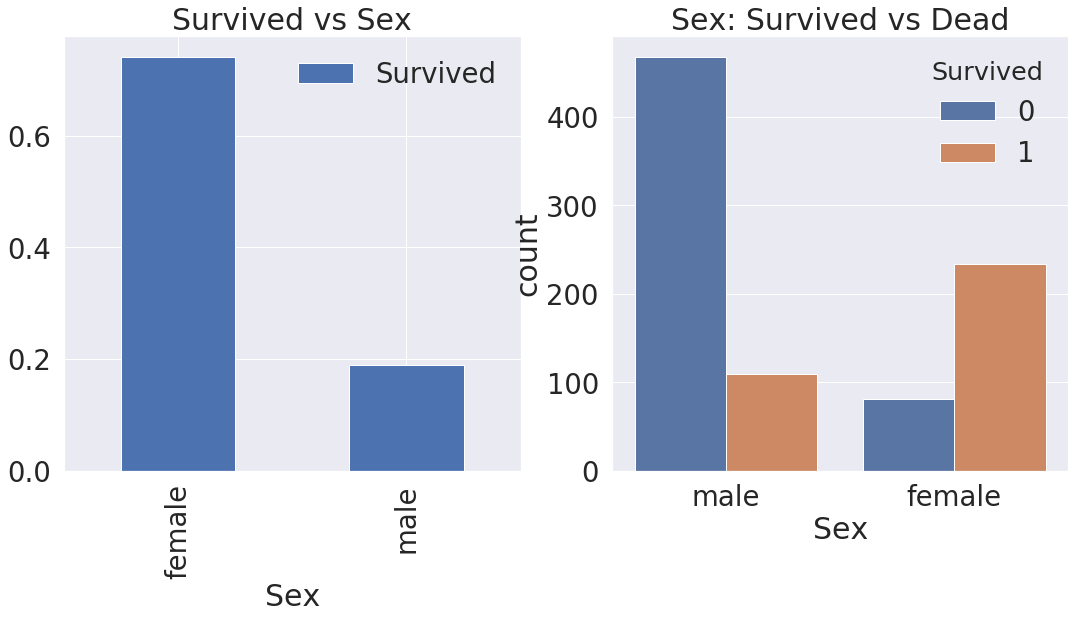

In [19]:
# female이 살 확률이 더 높다. 
f, ax = plt. subplots(1,2, figsize =(18,8))
df_train[['Sex','Survived']].groupby(['Sex'],as_index=True).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot('Sex',hue='Survived',data=df_train,ax=ax[1])
ax[1].set_title('Sex: Survived vs Dead')
plt.show()

In [20]:
df_train[['Sex','Survived']].groupby(['Sex'],as_index =False).mean().sort_values(by='Survived',ascending =False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [21]:
#pd의 crosstab == crosstable 이용 
pd.crosstab(df_train['Sex'],df_train['Survived'],margins =True).style.background_gradient(cmap='winter_r')

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


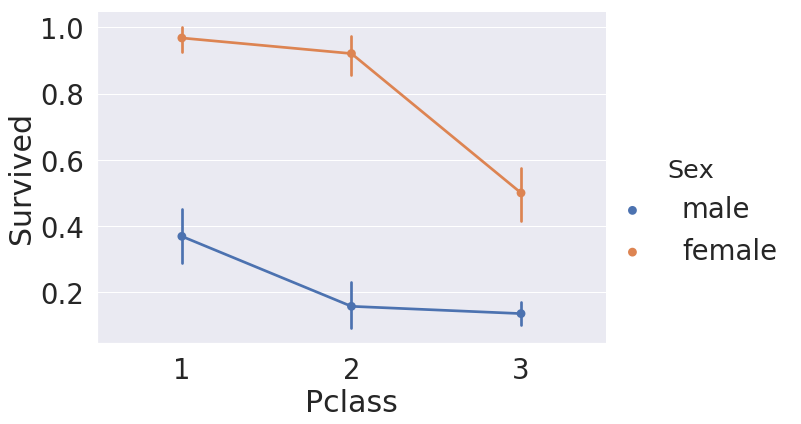

In [22]:
# 'Pclass' x축/'Survived' y축 
#  female이 살 확률이 더 높다! 좌석이 안좋아질수록 생존확률 낮아짐.. 
sns.factorplot('Pclass','Survived',hue='Sex',data=df_train,size = 6,aspect=1.5)

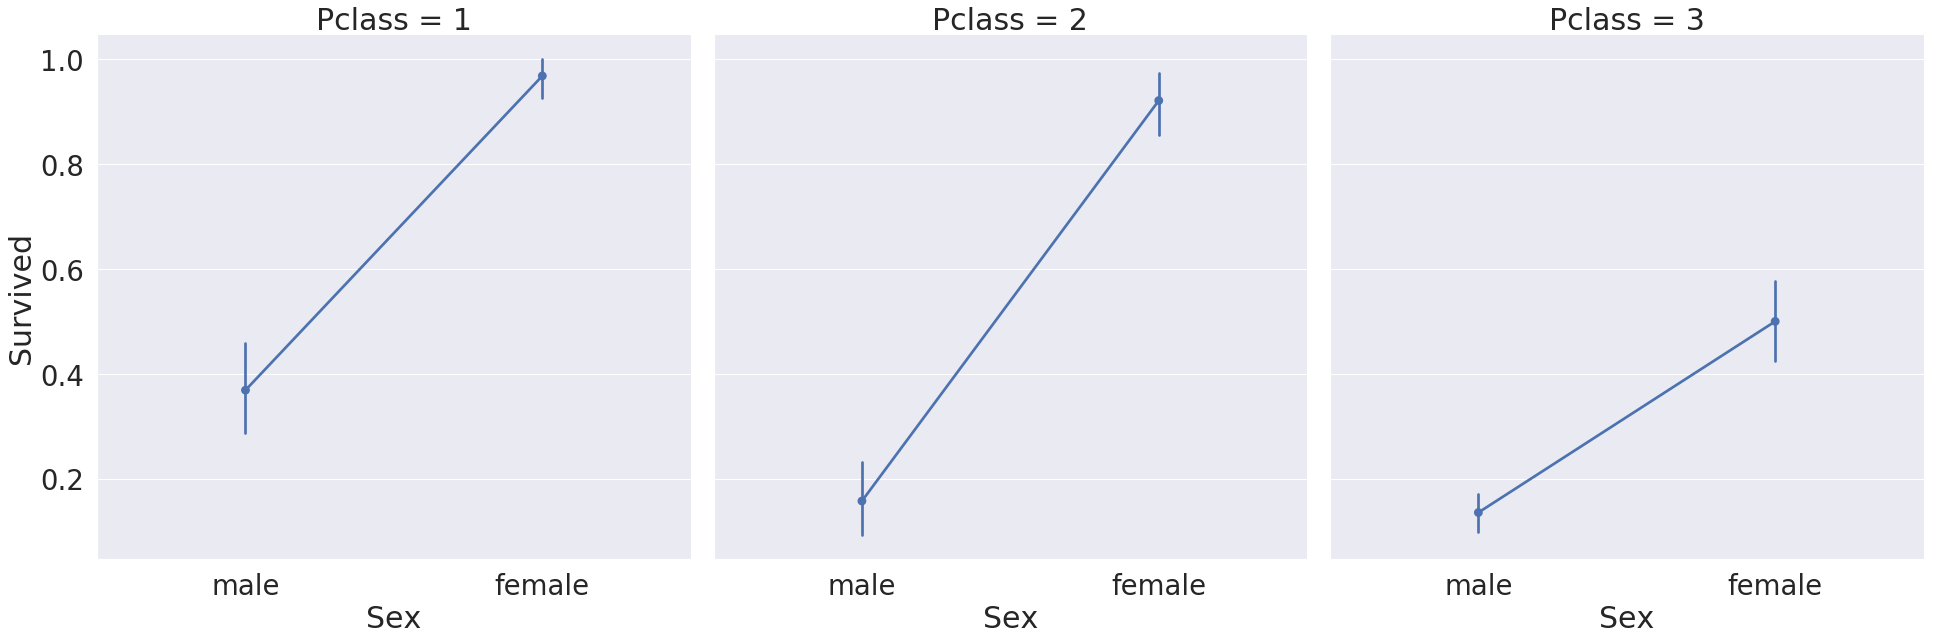

In [23]:
#축 ! 보는 방향을 바꾼거임. 
# col쓰면 pclass=1 ,2,3 별로 그래프 다 따로 볼 수 있음 ~
sns.factorplot(x='Sex',y='Survived',col='Pclass',data=df_train,satureation=.5,
              size = 9, aspect =1)

In [24]:
#
print('제일 나이 많은 탑승객 : {:.1f} Years'.format(df_train['Age'].max()))
print('제일 어린 탑승객 : {:.1f} Years'.format(df_train['Age'].min()))
print('탑승객 평균 나이 : {:.1f} Years'.format(df_train['Age'].mean()))


제일 나이 많은 탑승객 : 80.0 Years
제일 어린 탑승객 : 0.4 Years
탑승객 평균 나이 : 29.7 Years


In [25]:
too = df_train['Age']

In [26]:
too.mean()

29.69911764705882

In [27]:
too.max(0)

80.0

In [28]:
too.min()

0.42

In [29]:
too.value_counts()

24.00    30
22.00    27
18.00    26
19.00    25
30.00    25
         ..
55.50     1
70.50     1
66.00     1
23.50     1
0.42      1
Name: Age, Length: 88, dtype: int64

#### 여기 문법 이해 못했음

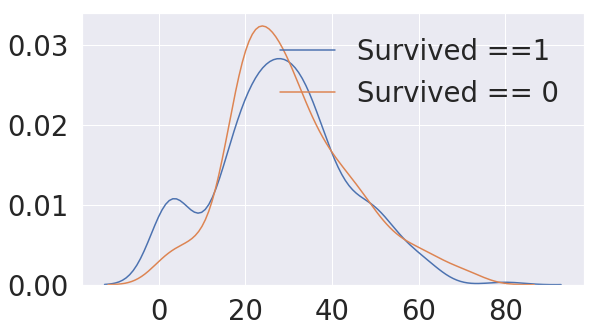

In [30]:
# kdeplot 데이터들의 분포가 어떻게 되어 있는지 대략 묘사/추정
# 히스토그램을 smooth하게 그린거 ㅋㅋ 
# pandas 에서 ['Survived'== 1] indexing하는 방법.
# df_train 안쪽 이해안감 ㅠㅠ
fig,ax = plt.subplots(1,1, figsize =(9,5))
sns.kdeplot(df_train[df_train['Survived'] == 1]['Age'], ax=ax)
sns.kdeplot(df_train[df_train['Survived'] == 0]['Age'], ax=ax)
plt.legend(['Survived ==1 ', 'Survived == 0'])
plt.show()

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

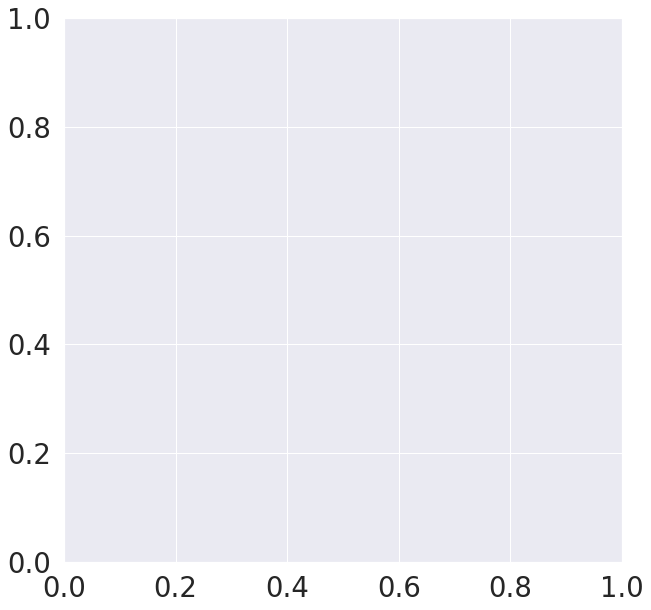

<Figure size 720x720 with 0 Axes>

In [31]:
f = plt.figure(figsize =(10,10))
f.ax = plt.subplots(1,1,figsize =(10,10))
plt.figure (figsize = (10,10))

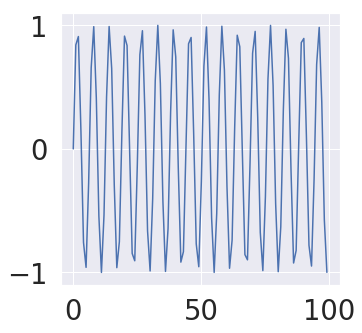

In [32]:
f = plt.figure(figsize = (5,5))
a = np.arange(100)
b = np.sin(a)
plt.plot(b)

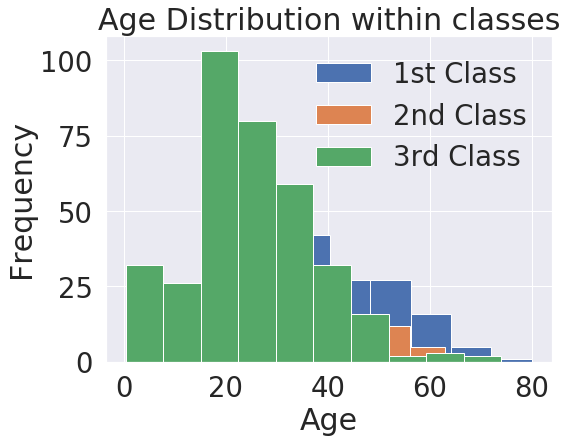

In [33]:
plt.figure(figsize=(8,6))
df_train['Age'][df_train['Pclass']== 1].plot(kind='hist')
df_train['Age'][df_train['Pclass']== 2].plot(kind='hist')
df_train['Age'][df_train['Pclass']== 3].plot(kind='hist')
plt.xlabel('Age')
plt.title('Age Distribution within classes')
plt.legend(['1st Class','2nd Class','3rd Class'])

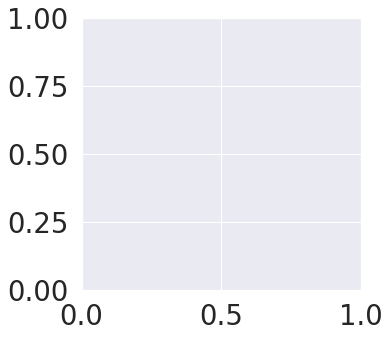

In [34]:
fig.ax = plt.subplots(1,1,figsize =(5,5))
a = np.arange(100)
b = np.sin(a)

ax.plot(b)

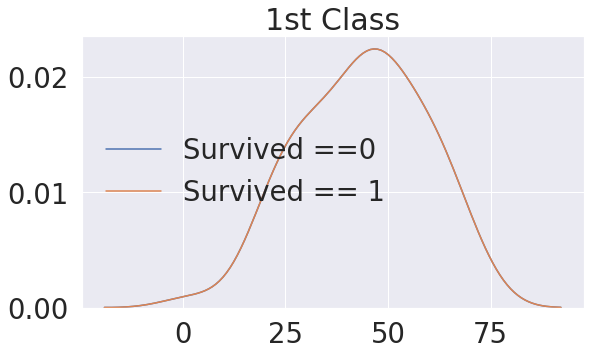

In [35]:
#전체 age데이터 셋에서 생존한 사람 분포. 
#생존확률에 따른 분포 볼 수 있음. 불린 이용
fig,ax = plt.subplots(1,1, figsize =(9,5))
sns.kdeplot(df_train[(df_train['Survived'] == 0)&(df_train['Pclass'] == 1)]['Age'], ax=ax)
sns.kdeplot(df_train[(df_train['Survived'] == 0)&(df_train['Pclass'] == 1)]['Age'], ax=ax)
plt.legend(['Survived ==0 ', 'Survived == 1'])
plt.title('1st Class')
plt.show()

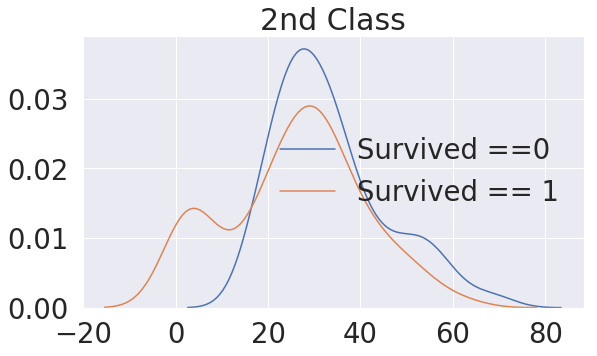

In [36]:
fig,ax = plt.subplots(1,1, figsize =(9,5))
sns.kdeplot(df_train[(df_train['Survived'] == 0)&(df_train['Pclass'] == 2)]['Age'], ax=ax)
sns.kdeplot(df_train[(df_train['Survived'] == 1)&(df_train['Pclass'] == 2)]['Age'], ax=ax)
plt.legend(['Survived ==0 ', 'Survived == 1'])
plt.title('2nd Class')
plt.show()

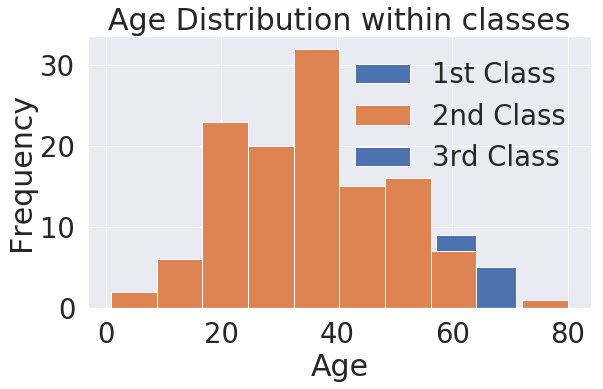

In [37]:
fig,ax = plt.subplots(1,1, figsize =(9,5))
df_train['Age'][(df_train['Pclass'] == 1) & (df_train['Survived'] == 0)].plot(kind='hist')
df_train['Age'][(df_train['Pclass'] == 1) & (df_train['Survived'] == 1)].plot(kind='hist')

plt.xlabel('Age')
plt.title('Age Distribution within classes')
plt.legend(['1st Class','2nd Class','3rd Class'])

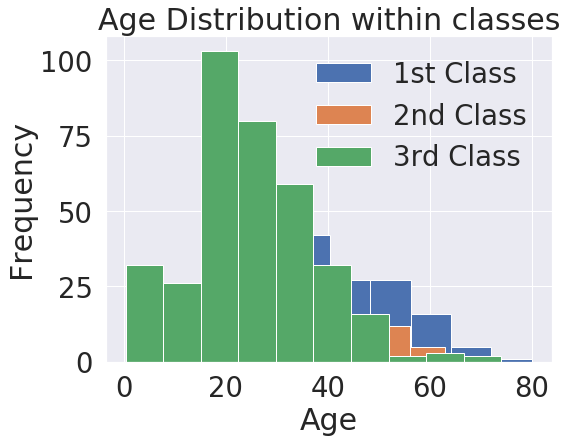

In [38]:
plt.figure(figsize=(8,6))
df_train['Age'][df_train['Pclass']== 1].plot(kind='hist')
df_train['Age'][df_train['Pclass']== 2].plot(kind='hist')
df_train['Age'][df_train['Pclass']== 3].plot(kind='hist')
plt.xlabel('Age')
plt.title('Age Distribution within classes')
plt.legend(['1st Class','2nd Class','3rd Class'])

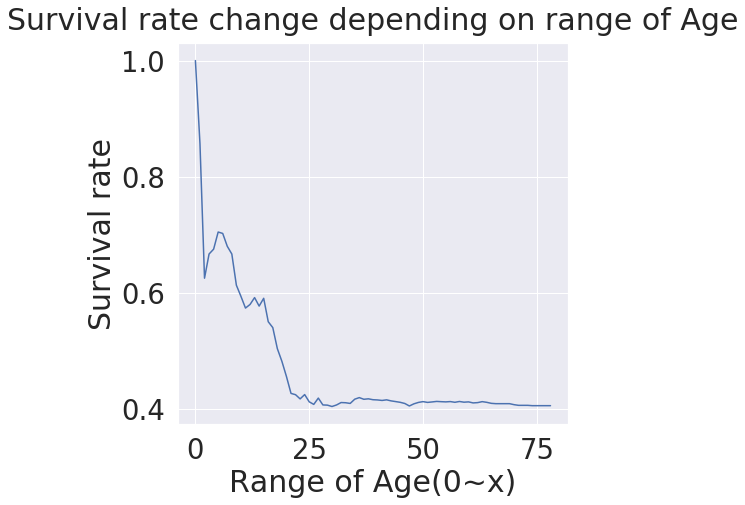

In [39]:
# i가 1살부터 80살까지 변화시키는데 x축 : y축은 생존확률의 변화
# 나이가 어릴수록 생존확률 겁나 높은 것을 알 수 있음
# sum 머임.. 
cummulate_survival_ratio = []
for i in range(1, 80):
    cummulate_survival_ratio.append(df_train[df_train['Age'] < i]['Survived'].sum() / len(df_train[df_train['Age'] < i]['Survived']))
    
plt.figure(figsize=(7, 7))
plt.plot(cummulate_survival_ratio)
plt.title('Survival rate change depending on range of Age', y=1.02)
plt.ylabel('Survival rate')
plt.xlabel('Range of Age(0~x)')
plt.show()

#Pclass,sex,age

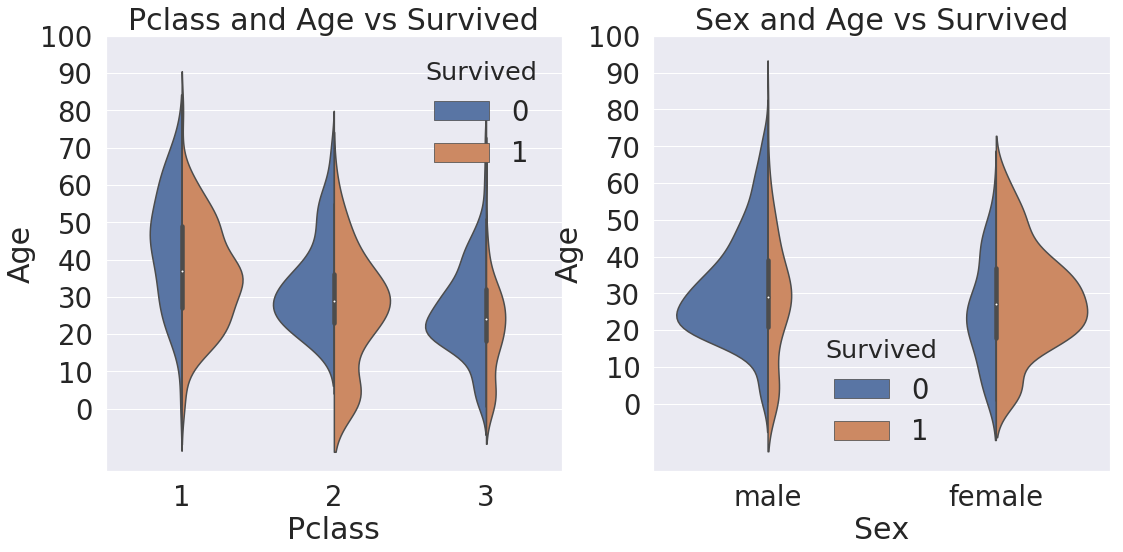

In [40]:
#female 생존 확률이 더 높다 
f,ax = plt.subplots(1,2, figsize =(18,8))
sns.violinplot("Pclass","Age",hue="Survived",data=df_train,scale='count',split=True,ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))
sns.violinplot("Sex","Age",hue = "Survived",data = df_train, scale='count',split=True,ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

***Embarked***
#탑승한 항구를 나타낸다

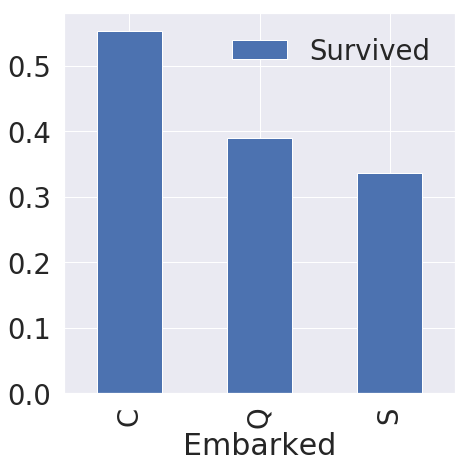

In [41]:
#
f,ax = plt.subplots(1,1, figsize = (7,7))
df_train[['Embarked','Survived']].groupby(['Embarked'],as_index=True).mean().sort_values(by='Survived',ascending=False).plot.bar(ax=ax)

In [42]:
#survived 에 대해 정렬해주는 것을 확인 가능!
df_train[['Embarked','Survived']].groupby(['Embarked'],as_index=True).mean().sort_values(by='Survived',ascending=True)

,Survived
Embarked,
S,0.336957
Q,0.389610
C,0.553571


In [43]:
df_train[['Embarked','Survived']].groupby(['Embarked'],as_index=True).mean().sort_index(by='Survived')

,Survived
Embarked,
S,0.336957
Q,0.389610
C,0.553571


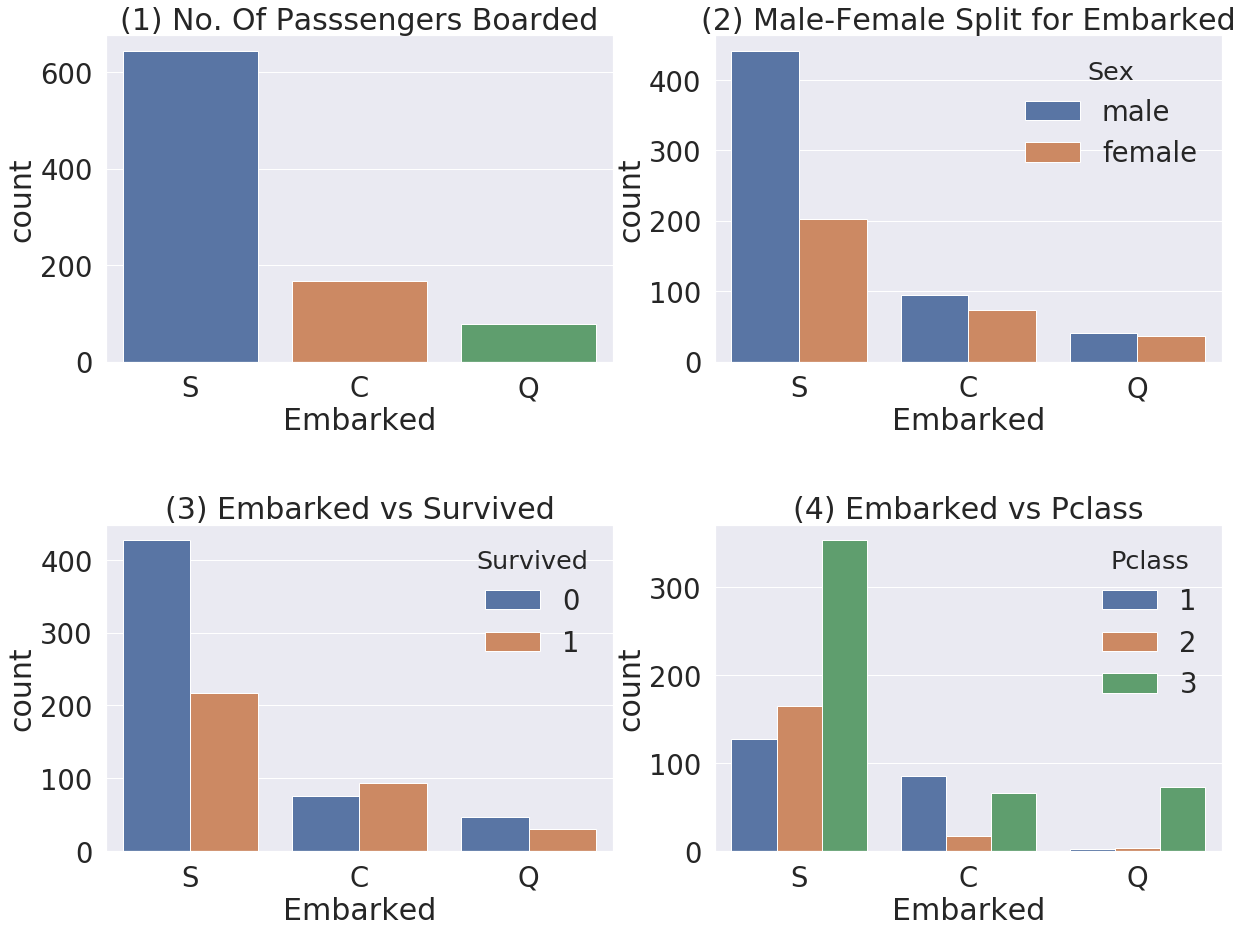

In [44]:
#여성이 많을수록 생존율이 높다
#C,Q에서 생존율이 높당
f,ax = plt.subplots(2,2, figsize=(20,15))
sns.countplot('Embarked', data = df_train, ax=ax[0,0])
ax[0,0].set_title('(1) No. Of Passsengers Boarded')
sns.countplot('Embarked', hue ='Sex', data=df_train, ax=ax[0,1])
ax[0,1].set_title('(2) Male-Female Split for Embarked')
sns.countplot('Embarked',hue='Survived', data=df_train,ax=ax[1,0])
ax[1,0].set_title('(3) Embarked vs Survived')
sns.countplot('Embarked', hue = 'Pclass',data=df_train, ax=ax[1,1])
ax[1,1].set_title('(4) Embarked vs Pclass')
plt.subplots_adjust(wspace =0.2 , hspace =0.5) #plot간의 간격을 넣어준거!
plt.show()

In [45]:
df_train['FamilySize'] = df_train['SibSp']+df_train['Parch']
+1 #자신을 포함해야하니 1을 더한다
df_test['FamilySize']=df_test['SibSp']+df_test['Parch']+1 #자신을 포함해야하니 1을 더한다

In [46]:
df_train['SibSp']

0      1
1      1
2      0
3      1
4      0
      ..
886    0
887    0
888    1
889    0
890    0
Name: SibSp, Length: 891, dtype: int64

In [47]:
print("Maximum size of Family: ",df_train['FamilySize'].max())
print("Minimum size of Family: ", df_train['FamilySize'].min())

Maximum size of Family:  10
Minimum size of Family:  0


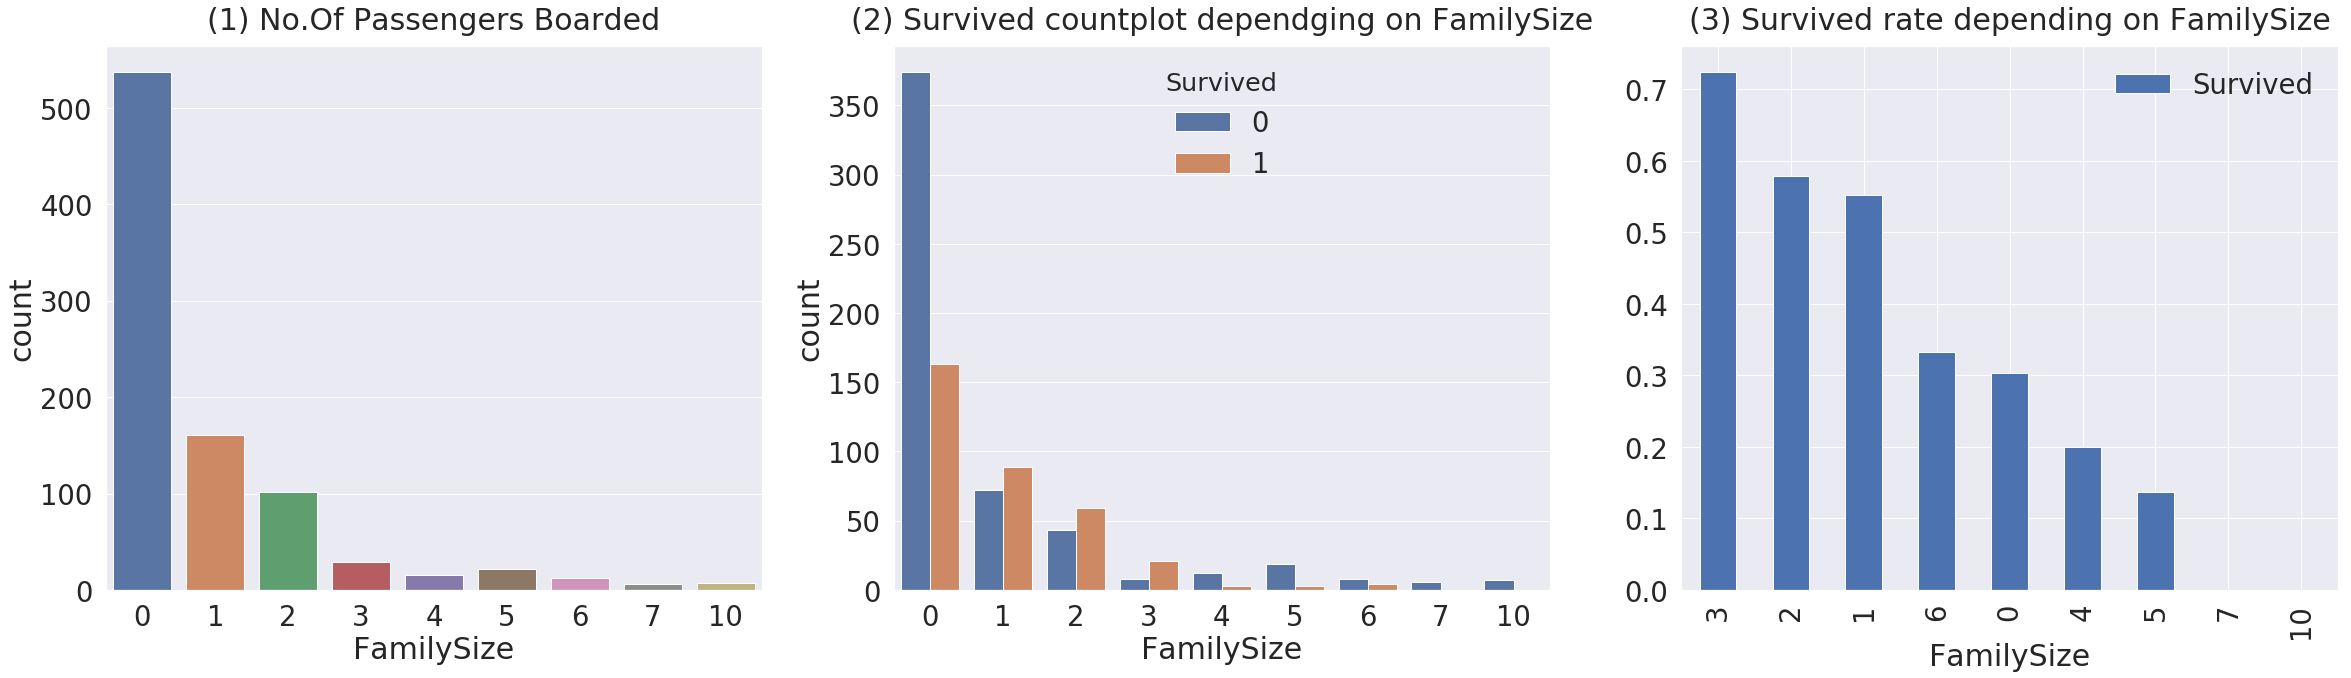

In [48]:
#혼자 탄 사람은 500명, 가족단위로도 많이 탐
#familysize hue로 색깔 넣어줌. survived 한 사람들
f,ax = plt.subplots(1,3, figsize =(40,10))
sns.countplot('FamilySize',data=df_train,ax=ax[0])
ax[0].set_title('(1) No.Of Passengers Boarded', y=1.02)

sns.countplot('FamilySize',hue='Survived',data=df_train, ax=ax[1])
ax[1].set_title('(2) Survived countplot dependging on FamilySize', y=1.02)

df_train[['FamilySize','Survived']].groupby(['FamilySize'],as_index=True).mean().sort_values(by='Survived',ascending=False).plot.bar(ax=ax[2])
ax[2].set_title('(3) Survived rate depending on FamilySize', y=1.02)

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

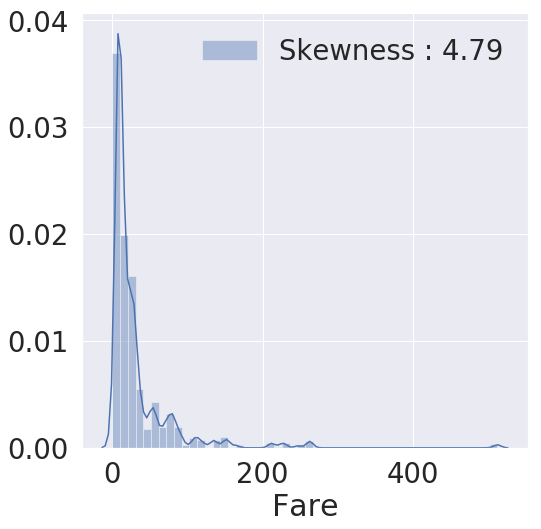

In [49]:
#이 데이터셋을 포함하는 내용
# 패턴 잘 못 보여줌ㅠ
fig,ax = plt.subplots(1,1, figsize=(8,8))
g = sns.distplot(df_train['Fare'],color = 'b',label ='Skewness : {:.2f}'.format(df_train['Fare'].skew()),ax =ax)
g = g.legend(loc ='best')

In [50]:
#log를 취해야 한다
df_test.loc[df_test.Fare.isnull(), 'Fare']=df_test['Fare'].mean() 

df_train['Fare'] = df_train['Fare'].map(lambda i: np.log(i) if i > 0 else 0)
df_test['Fare'] = df_test['Fare'].map(lambda i: np.log(i) if i > 0 else 0)


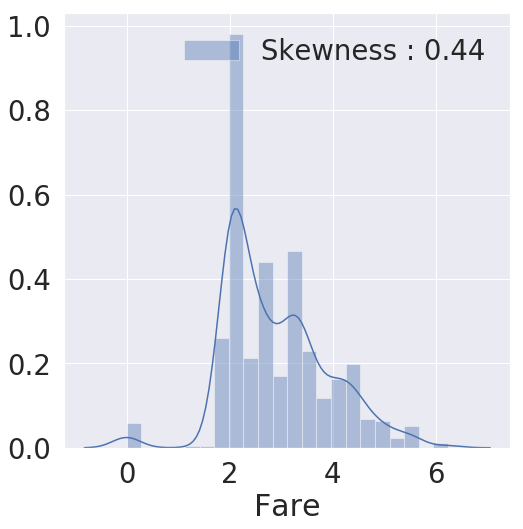

In [51]:
# g로 반환 log를 취해서 scareness 줄여주고 --> feature engineering
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
g = sns.distplot(df_train['Fare'], color='b', label='Skewness : {:.2f}'.format(df_train['Fare'].skew()), ax=ax)
g = g.legend(loc='best')

****cabin NaN 데이터가 겁나 많다
****그래서 Ticket으로 처리

In [52]:
#ticket도 뺄고임 
df_train['Ticket'].value_counts()

1601         7
CA. 2343     7
347082       7
CA 2144      6
3101295      6
            ..
234604       1
SW/PP 751    1
A/5. 3337    1
335677       1
350048       1
Name: Ticket, Length: 681, dtype: int64

In [53]:
#age에 null data 몇개여?확인할 때
df_train['Age'].isnull().sum()

177

In [54]:
df_train['Age'].mean(0)

29.69911764705882

In [55]:
#row data 중 정규표현식에 맞는 애 추출해주는 method
df_train['Initial']=df_train['Name'].str.extract('([A-Za-z]+)\.')
df_test['Initial']=df_test['Name'].str.extract('([A-Za-z]+)\.')

In [56]:
pd.crosstab(df_train['Initial'],df_train['Sex']).T.style.background_gradient(cmap='summer_r')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [57]:
df_train['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don', 'Dona'],
                        ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr', 'Mr'],inplace=True)

df_test['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don', 'Dona'],
                        ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr', 'Mr'],inplace=True)

In [58]:
df_train.groupby('Initial').mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize
Initial,,,,,,,,
Master,414.975000,0.575000,2.625000,4.574167,2.300000,1.375000,3.340710,3.675000
Miss,411.741935,0.704301,2.284946,21.860000,0.698925,0.537634,3.123713,1.236559
Mr,455.880907,0.162571,2.381853,32.739609,0.293006,0.151229,2.651507,0.444234
Mrs,456.393701,0.795276,1.984252,35.981818,0.692913,0.818898,3.443751,1.511811
Other,564.444444,0.111111,1.666667,45.888889,0.111111,0.111111,2.641605,0.222222


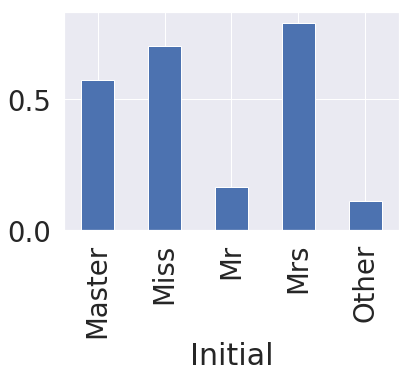

In [59]:
df_train.groupby('Initial')['Survived'].mean().plot.bar()

#### test-진짜 단지 test일뿐! test에 있는걸로 채워넣는다?말이 안됨.
#### train set에서 얻은애를 test에 채워 넣어야돼

In [60]:
## loc쓰면 null에 채워 넣을 수 있음. [행,열]
df_train.loc[(df_train['Age'].isnull()),:]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Initial
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,2.135148,NaN,Q,0,Mr
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,2.564949,NaN,S,0,Mr
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,1.977547,NaN,C,0,Mrs
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,1.977547,NaN,C,0,Mr
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,2.064226,NaN,Q,0,Miss
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,1.978128,NaN,C,0,Mr
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,4.242046,NaN,S,10,Miss
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,2.251292,NaN,S,0,Mr
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,2.066331,NaN,S,0,Mr


In [61]:
df_train['Age'].isnull()

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888     True
889    False
890    False
Name: Age, Length: 891, dtype: bool

In [62]:
# = 상수(위의 Mr인 사람의 agㄷ 평균)
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Mr'),'Age'] = 33
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Mrs'),'Age'] = 36
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Master'),'Age'] = 5
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Miss'),'Age'] = 22
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Other'),'Age'] = 46

df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Mr'),'Age'] = 33
df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Mrs'),'Age'] = 36
df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Master'),'Age'] = 5
df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Miss'),'Age'] = 22
df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Other'),'Age'] = 46

####Embarked feature! 

In [63]:
df_train['Embarked'].isnull().sum()

2

In [64]:
df_train.shape

(891, 14)

In [65]:
df_train['Embarked'].fillna('S',inplace=True)

In [66]:
df_train['Embarked'].isnull().sum()

0

In [67]:
df_train['Age_cat']=0

In [68]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Initial,Age_cat
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,1.981001,NaN,S,1,Mr,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,4.266662,C85,C,1,Mrs,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,2.070022,NaN,S,0,Miss,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,3.972177,C123,S,1,Mrs,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,2.085672,NaN,S,0,Mr,0


In [69]:
df_train['Age_cat'] = 0
df_train.loc[df_train['Age'] < 10, 'Age_cat'] = 0
df_train.loc[(10 <= df_train['Age']) & (df_train['Age'] < 20), 'Age_cat'] = 1
df_train.loc[(20 <= df_train['Age']) & (df_train['Age'] < 30), 'Age_cat'] = 2
df_train.loc[(30 <= df_train['Age']) & (df_train['Age'] < 40), 'Age_cat'] = 3
df_train.loc[(40 <= df_train['Age']) & (df_train['Age'] < 50), 'Age_cat'] = 4
df_train.loc[(50 <= df_train['Age']) & (df_train['Age'] < 60), 'Age_cat'] = 5
df_train.loc[(60 <= df_train['Age']) & (df_train['Age'] < 70), 'Age_cat'] = 6
df_train.loc[70 <= df_train['Age'], 'Age_cat'] = 7

df_test['Age_cat'] = 0
df_test.loc[df_test['Age'] < 10, 'Age_cat'] = 0
df_test.loc[(10 <= df_test['Age']) & (df_test['Age'] < 20), 'Age_cat'] = 1
df_test.loc[(20 <= df_test['Age']) & (df_test['Age'] < 30), 'Age_cat'] = 2
df_test.loc[(30 <= df_test['Age']) & (df_test['Age'] < 40), 'Age_cat'] = 3
df_test.loc[(40 <= df_test['Age']) & (df_test['Age'] < 50), 'Age_cat'] = 4
df_test.loc[(50 <= df_test['Age']) & (df_test['Age'] < 60), 'Age_cat'] = 5
df_test.loc[(60 <= df_test['Age']) & (df_test['Age'] < 70), 'Age_cat'] = 6
df_test.loc[70 <= df_test['Age'], 'Age_cat'] = 7

In [70]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Initial,Age_cat
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,1.981001,NaN,S,1,Mr,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,4.266662,C85,C,1,Mrs,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,2.070022,NaN,S,0,Miss,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,3.972177,C123,S,1,Mrs,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,2.085672,NaN,S,0,Mr,3


In [71]:
def category_age(x):
    if x < 10:
        return 0
    elif x < 20:
        return 1
    elif x < 30:
        return 2
    elif x < 40:
        return 3
    elif x < 50:
        return 4
    elif x < 60:
        return 5
    elif x < 70:
        return 6
    else:
        return 7   
    

In [72]:
df_train['Age_cat_2']=df_train['Age'].apply(category_age)

In [73]:
# all 모든게 true일때만 true
(df_train['Age_cat'] == df_train['Age_cat_2']).all()

True

In [74]:
# 하나라도 true면 any는 true! 
(df_train['Age_cat'] == df_train['Age_cat_2']).any()

True

In [75]:
# axis =1로 두면 축이 1
df_train.drop(['Age','Age_cat_2'],axis=1,inplace= True)
df_test.drop(['Age'],axis=1,inplace= True)

In [76]:
df_train.Initial.unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Other'], dtype=object)

In [77]:
df_train.loc[df_train['Initial']=='Master','Initial']

7      Master
16     Master
50     Master
59     Master
63     Master
65     Master
78     Master
125    Master
159    Master
164    Master
165    Master
171    Master
176    Master
182    Master
183    Master
193    Master
261    Master
278    Master
305    Master
340    Master
348    Master
386    Master
407    Master
445    Master
480    Master
489    Master
549    Master
709    Master
751    Master
755    Master
787    Master
788    Master
802    Master
803    Master
819    Master
824    Master
827    Master
831    Master
850    Master
869    Master
Name: Initial, dtype: object

In [78]:
df_train['Initial'] = df_train['Initial'].map({'Master': 0, 'Miss': 1, 'Mr': 2, 'Mrs': 3, 'Other': 4})
df_test['Initial'] = df_test['Initial'].map({'Master': 0, 'Miss': 1, 'Mr': 2, 'Mrs': 3, 'Other': 4})

In [79]:
#특정 칼럼에 뭐 들어있는지 확인하고 싶을 때 사용법 2가지
df_train['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [80]:
df_train['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [81]:
# Embarked 숫자로 바꿈!
df_train['Embarked'] = df_train['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})
df_test['Embarked'] = df_test['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

In [82]:
df_train['Embarked'].isnull().any()

False

In [83]:
df_train['Sex'].unique()

array(['male', 'female'], dtype=object)

In [84]:
df_train['Sex']=df_train['Sex'].map({'female':0, 'male':1})
df_test['Sex']=df_test['Sex'].map({'female':0, 'male':1})


###이제 다 데이터를 수치화 했음으로 상관관계를 함 구해보자!

In [85]:
heatmap_data = df_train[['Survived','Pclass','Sex','Fare','Embarked','FamilySize','Initial','Age_cat']]

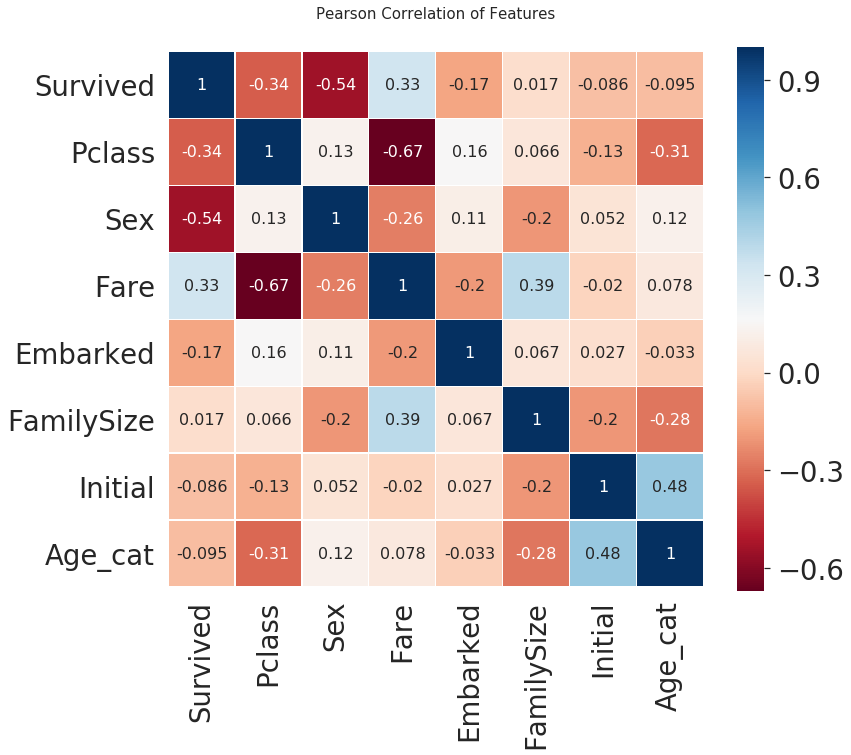

In [86]:
# 불필요한 feature가 없누!선형관계가 1이면 둘중에 하나만 있어도 상관없다 이소리,,1 or -1이면 둘중에 하나는 필요없서
heatmap_data = df_train[['Survived', 'Pclass', 'Sex', 'Fare', 'Embarked', 'FamilySize', 'Initial', 'Age_cat']] 

colormap = plt.cm.RdBu
plt.figure(figsize=(12,10))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(heatmap_data.astype(float).corr(), linewidths=0.1, vmax=1.0,
           square=True, cmap=colormap, linecolor='white', annot=True, annot_kws={"size": 16})

del heatmap_data

In [87]:
# one-hot encoding 모델의 성능을 높이기 위해 원핫인코딩 ㅋㅋ 
df_train = pd.get_dummies(df_train, columns = ['Initial'],prefix = 'Initial')
df_test = pd.get_dummies(df_test, columns = ['Initial'],prefix = 'Initial')

In [88]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Age_cat,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4
0,1,0,3,"Braund, Mr. Owen Harris",1,1,0,A/5 21171,1.981001,NaN,2,1,2,0,0,1,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,0,PC 17599,4.266662,C85,0,1,3,0,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",0,0,0,STON/O2. 3101282,2.070022,NaN,2,0,2,0,1,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,0,113803,3.972177,C123,2,1,3,0,0,0,1,0
4,5,0,3,"Allen, Mr. William Henry",1,0,0,373450,2.085672,NaN,2,0,3,0,0,1,0,0


In [89]:
df_train = pd.get_dummies(df_train, columns=['Embarked'], prefix='Embarked')
df_test = pd.get_dummies(df_test, columns=['Embarked'], prefix='Embarked')


In [90]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,FamilySize,Age_cat,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4,Embarked_0,Embarked_1,Embarked_2
0,1,0,3,"Braund, Mr. Owen Harris",1,1,0,A/5 21171,1.981001,NaN,1,2,0,0,1,0,0,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,0,PC 17599,4.266662,C85,1,3,0,0,0,1,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",0,0,0,STON/O2. 3101282,2.070022,NaN,0,2,0,1,0,0,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,0,113803,3.972177,C123,1,3,0,0,0,1,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",1,0,0,373450,2.085672,NaN,0,3,0,0,1,0,0,0,0,1


In [91]:
#필요한 columns만 남기고 다 지워버리기
df_train.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin'], axis=1, inplace=True)
df_test.drop(['PassengerId', 'Name',  'SibSp', 'Parch', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [92]:
df_train.head()

,Survived,Pclass,Sex,Fare,FamilySize,Age_cat,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4,Embarked_0,Embarked_1,Embarked_2
0,0,3,1,1.981001,1,2,0,0,1,0,0,0,0,1
1,1,1,0,4.266662,1,3,0,0,0,1,0,1,0,0
2,1,3,0,2.070022,0,2,0,1,0,0,0,0,0,1
3,1,1,0,3.972177,1,3,0,0,0,1,0,0,0,1
4,0,3,1,2.085672,0,3,0,0,1,0,0,0,0,1


In [93]:
df_test.head()

,Pclass,Sex,Fare,FamilySize,Age_cat,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4,Embarked_0,Embarked_1,Embarked_2
0,3,1,2.057860,1,3,0,0,1,0,0,0,1,0
1,3,0,1.945910,2,4,0,0,0,1,0,0,0,1
2,2,1,2.270836,1,6,0,0,1,0,0,0,1,0
3,3,1,2.159003,1,2,0,0,1,0,0,0,0,1
4,3,0,2.508582,3,2,0,0,0,1,0,0,0,1


In [94]:
#sklearn은 사용해 머신러닝 모델 만들기
#importing all the required ML packages
from sklearn.ensemble import RandomForestClassifier #랜덤포레스트
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [95]:
#학습 데이터와 target label를 분리하기 -- drop 사용해
X_train = df_train.drop('Survived',axis=1).values
target_label = df_train['Survived'].values
X_test = df_test.values

In [96]:
X_tr, X_vld, y_tr, y_vld = train_test_split(X_train, target_label, test_size=0.3, random_state=2018)

Model generation and prediction

In [97]:
model = RandomForestClassifier()
model.fit(X_tr, y_tr)
prediction = model.predict(X_vld)

In [98]:
#모델 쩌러
print('총 {}명 중 {:.2f}% 정확도로 생존을 맞춤'.format(y_vld.shape[0], 100 * metrics.accuracy_score(prediction, y_vld)))

총 268명 중 82.84% 정확도로 생존을 맞춤


In [99]:
##feature importance 
##어떤 feature에 지금 만든 모델이 가장 많이 영향을 받았는 지 확인 가능

In [100]:
from pandas import Series

feature_importance = model.feature_importances_
Series_feat_imp = Series(feature_importance, index=df_test.columns)

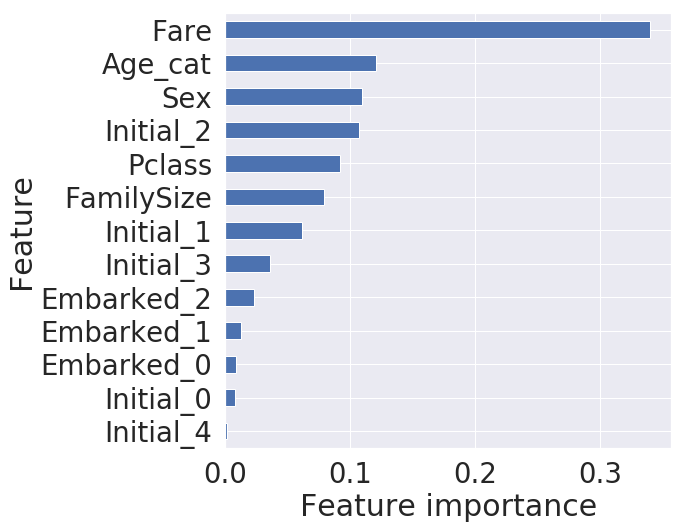

In [101]:
plt.figure(figsize = (8,8))
Series_feat_imp.sort_values(ascending = True).plot.barh()
plt.xlabel('Feature importance')
plt.ylabel('Feature')
plt.show()

In [102]:
##prediction on test set
#생존 여부 예측해보기!

In [103]:
submission =  pd.read_csv('../input/titanic/gender_submission.csv')

In [104]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [105]:
prediction = model.predict(X_test)
submission['Survived']=prediction

In [106]:
submission.to_csv('/my_first_submission.csv',index=False)

> 끝!